# Face Mask Detection Using YOLOv5

#### 1.0 Cloning and installation

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!cd yolov5 & pip install -r requirements.txt
!pip3 install -q roboflow
!pip3 install wandb

#### 1.1 imports

In [ ]:
import os
import torch
from roboflow import Roboflow
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

#### 1.2. Read in the data:

In [ ]:
rf = Roboflow(model_format="yolov5", notebook="ultralytics") # using yolov5s model
#Downloading data from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="NTBVpXsvtvRhuLo2VfSx")
project = rf.workspace().project("b-kf8ay")
dataset = project.version(2).download("yolov5")

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to b-2 in yolov5pytorch:: 100%|███████████████████| 1708/1708 [00:00<00:00, 2885.14it/s]


#### 1.3. Visualize the data:

In [ ]:
#exploring the classes
!cat b-2/data.yaml

names:
- mask_weared_incorrect
- with_mask
- without_mask
nc: 3
train: b-2/train/images
val: b-2/valid/images


#### 1.4. Custom Training:

In [ ]:
#Data all ready trained using 300 epoch
#!python yolov5/train.py --img 416 --batch 16 --epoch 300 --data b-2/data.yaml --weights yolov5s.pt 

#### 1.5. loading custom model:

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom', path=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp3\weights\last.pt")   #use force_reload= True to use latest train

Using cache found in C:\Users\azana/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-21 torch 1.10.1+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


#### 1.6. Testing with images

In [ ]:
# random image test 
result2=model('https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/9c16ecff-88df-41ea-a511-105cfcba8c38/fx1_lrg.jpg')

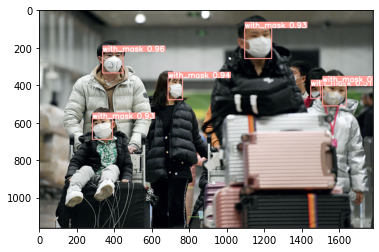

None


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(result2.render()))
print(plt.show())

#### 1.6 Display Results & precision:

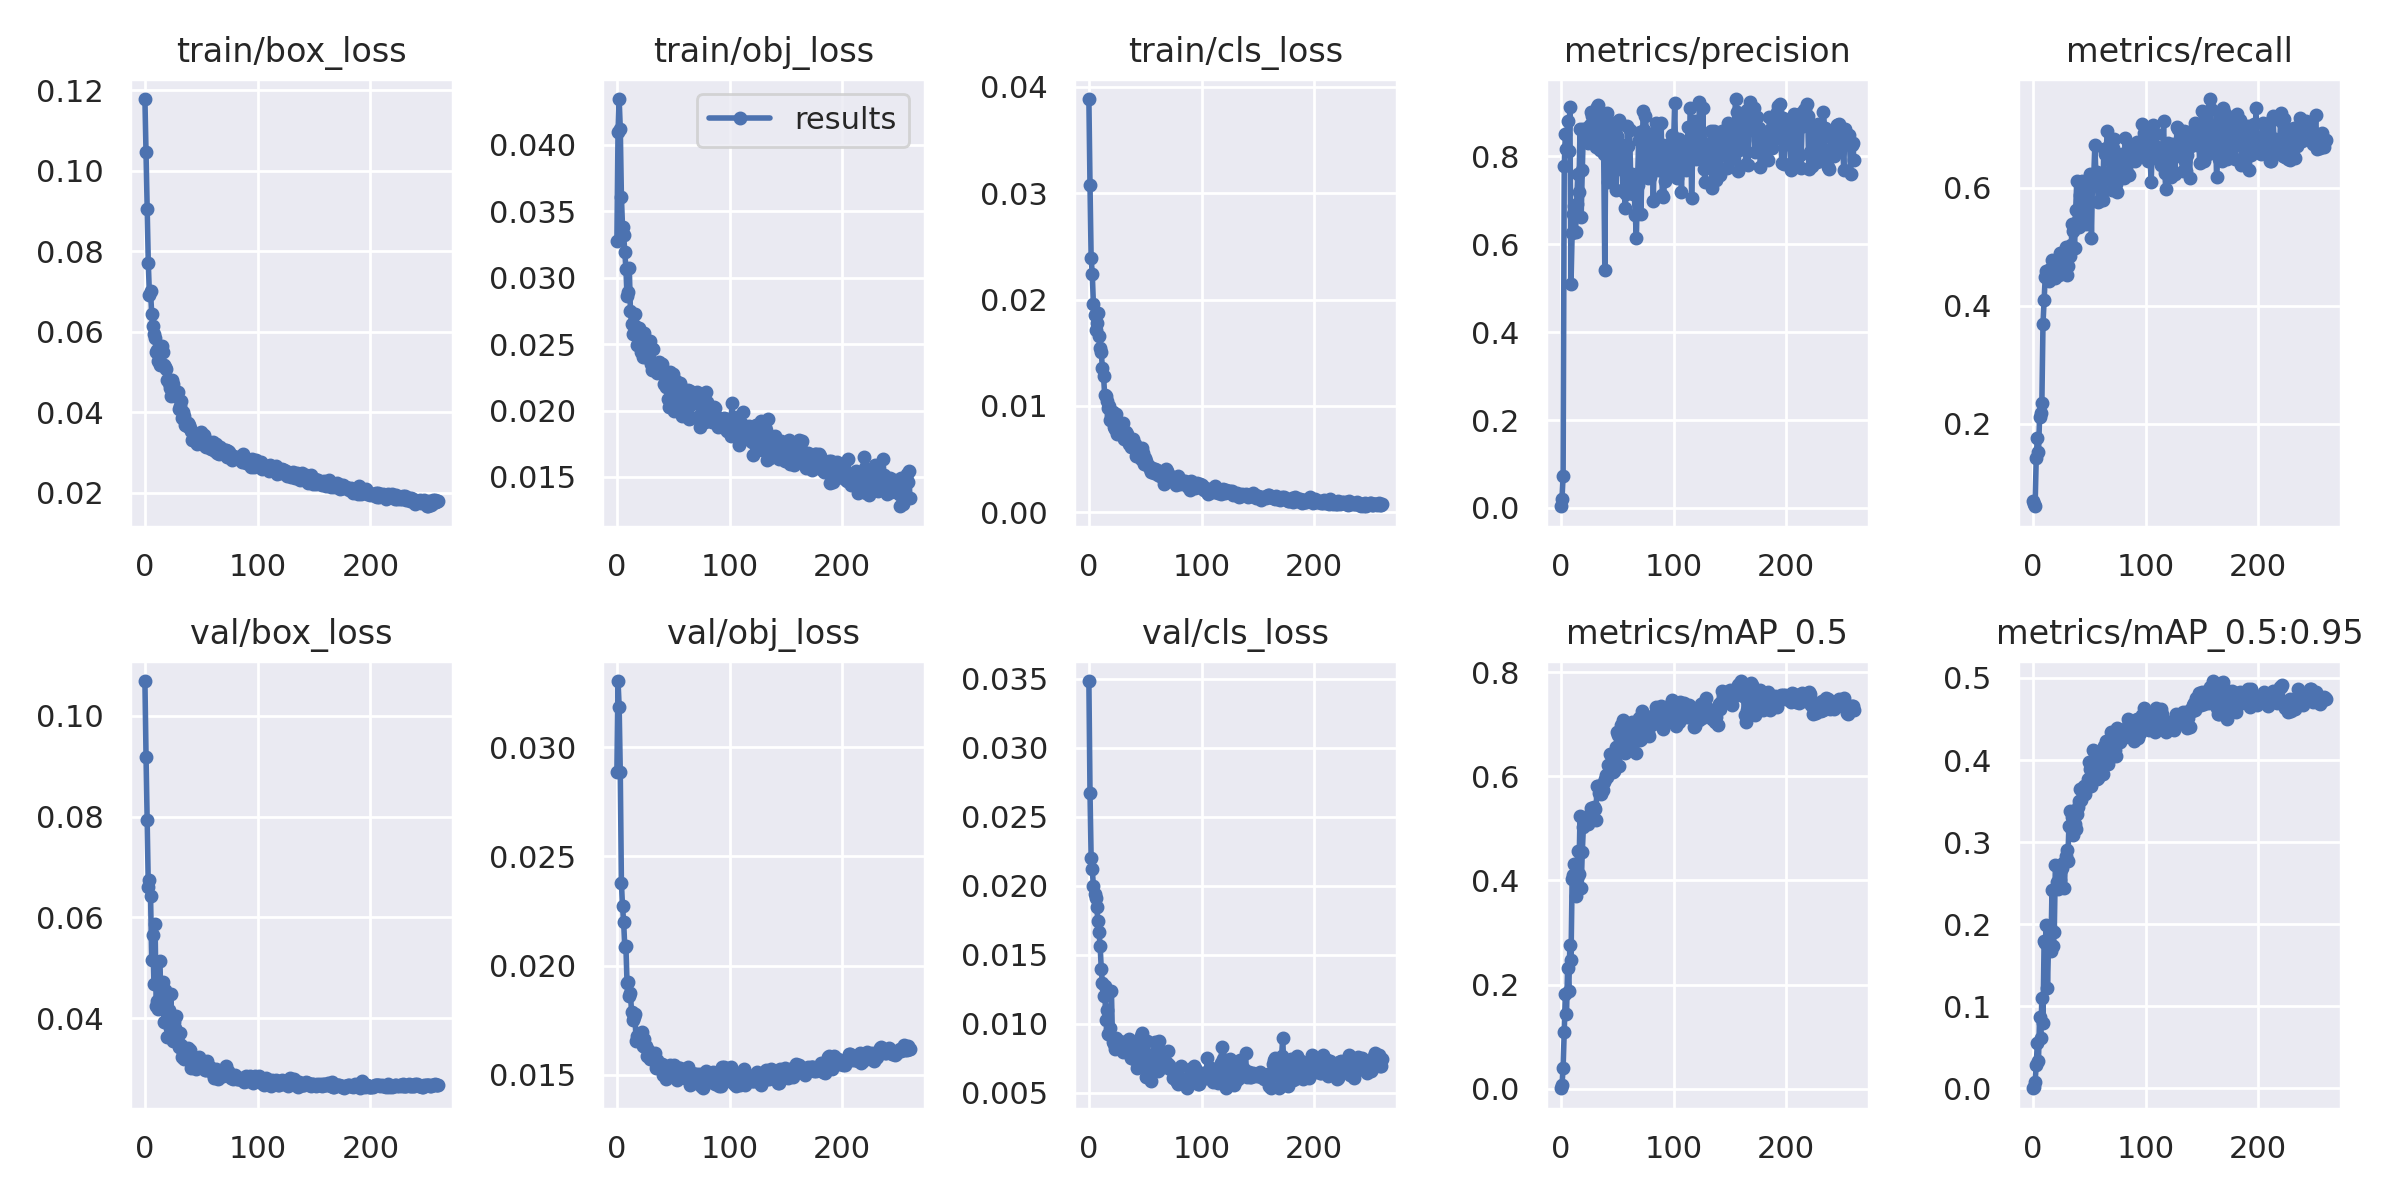

In [ ]:
from IPython.display import Image
Image(filename=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp\results.png") 

#### confusion matrix

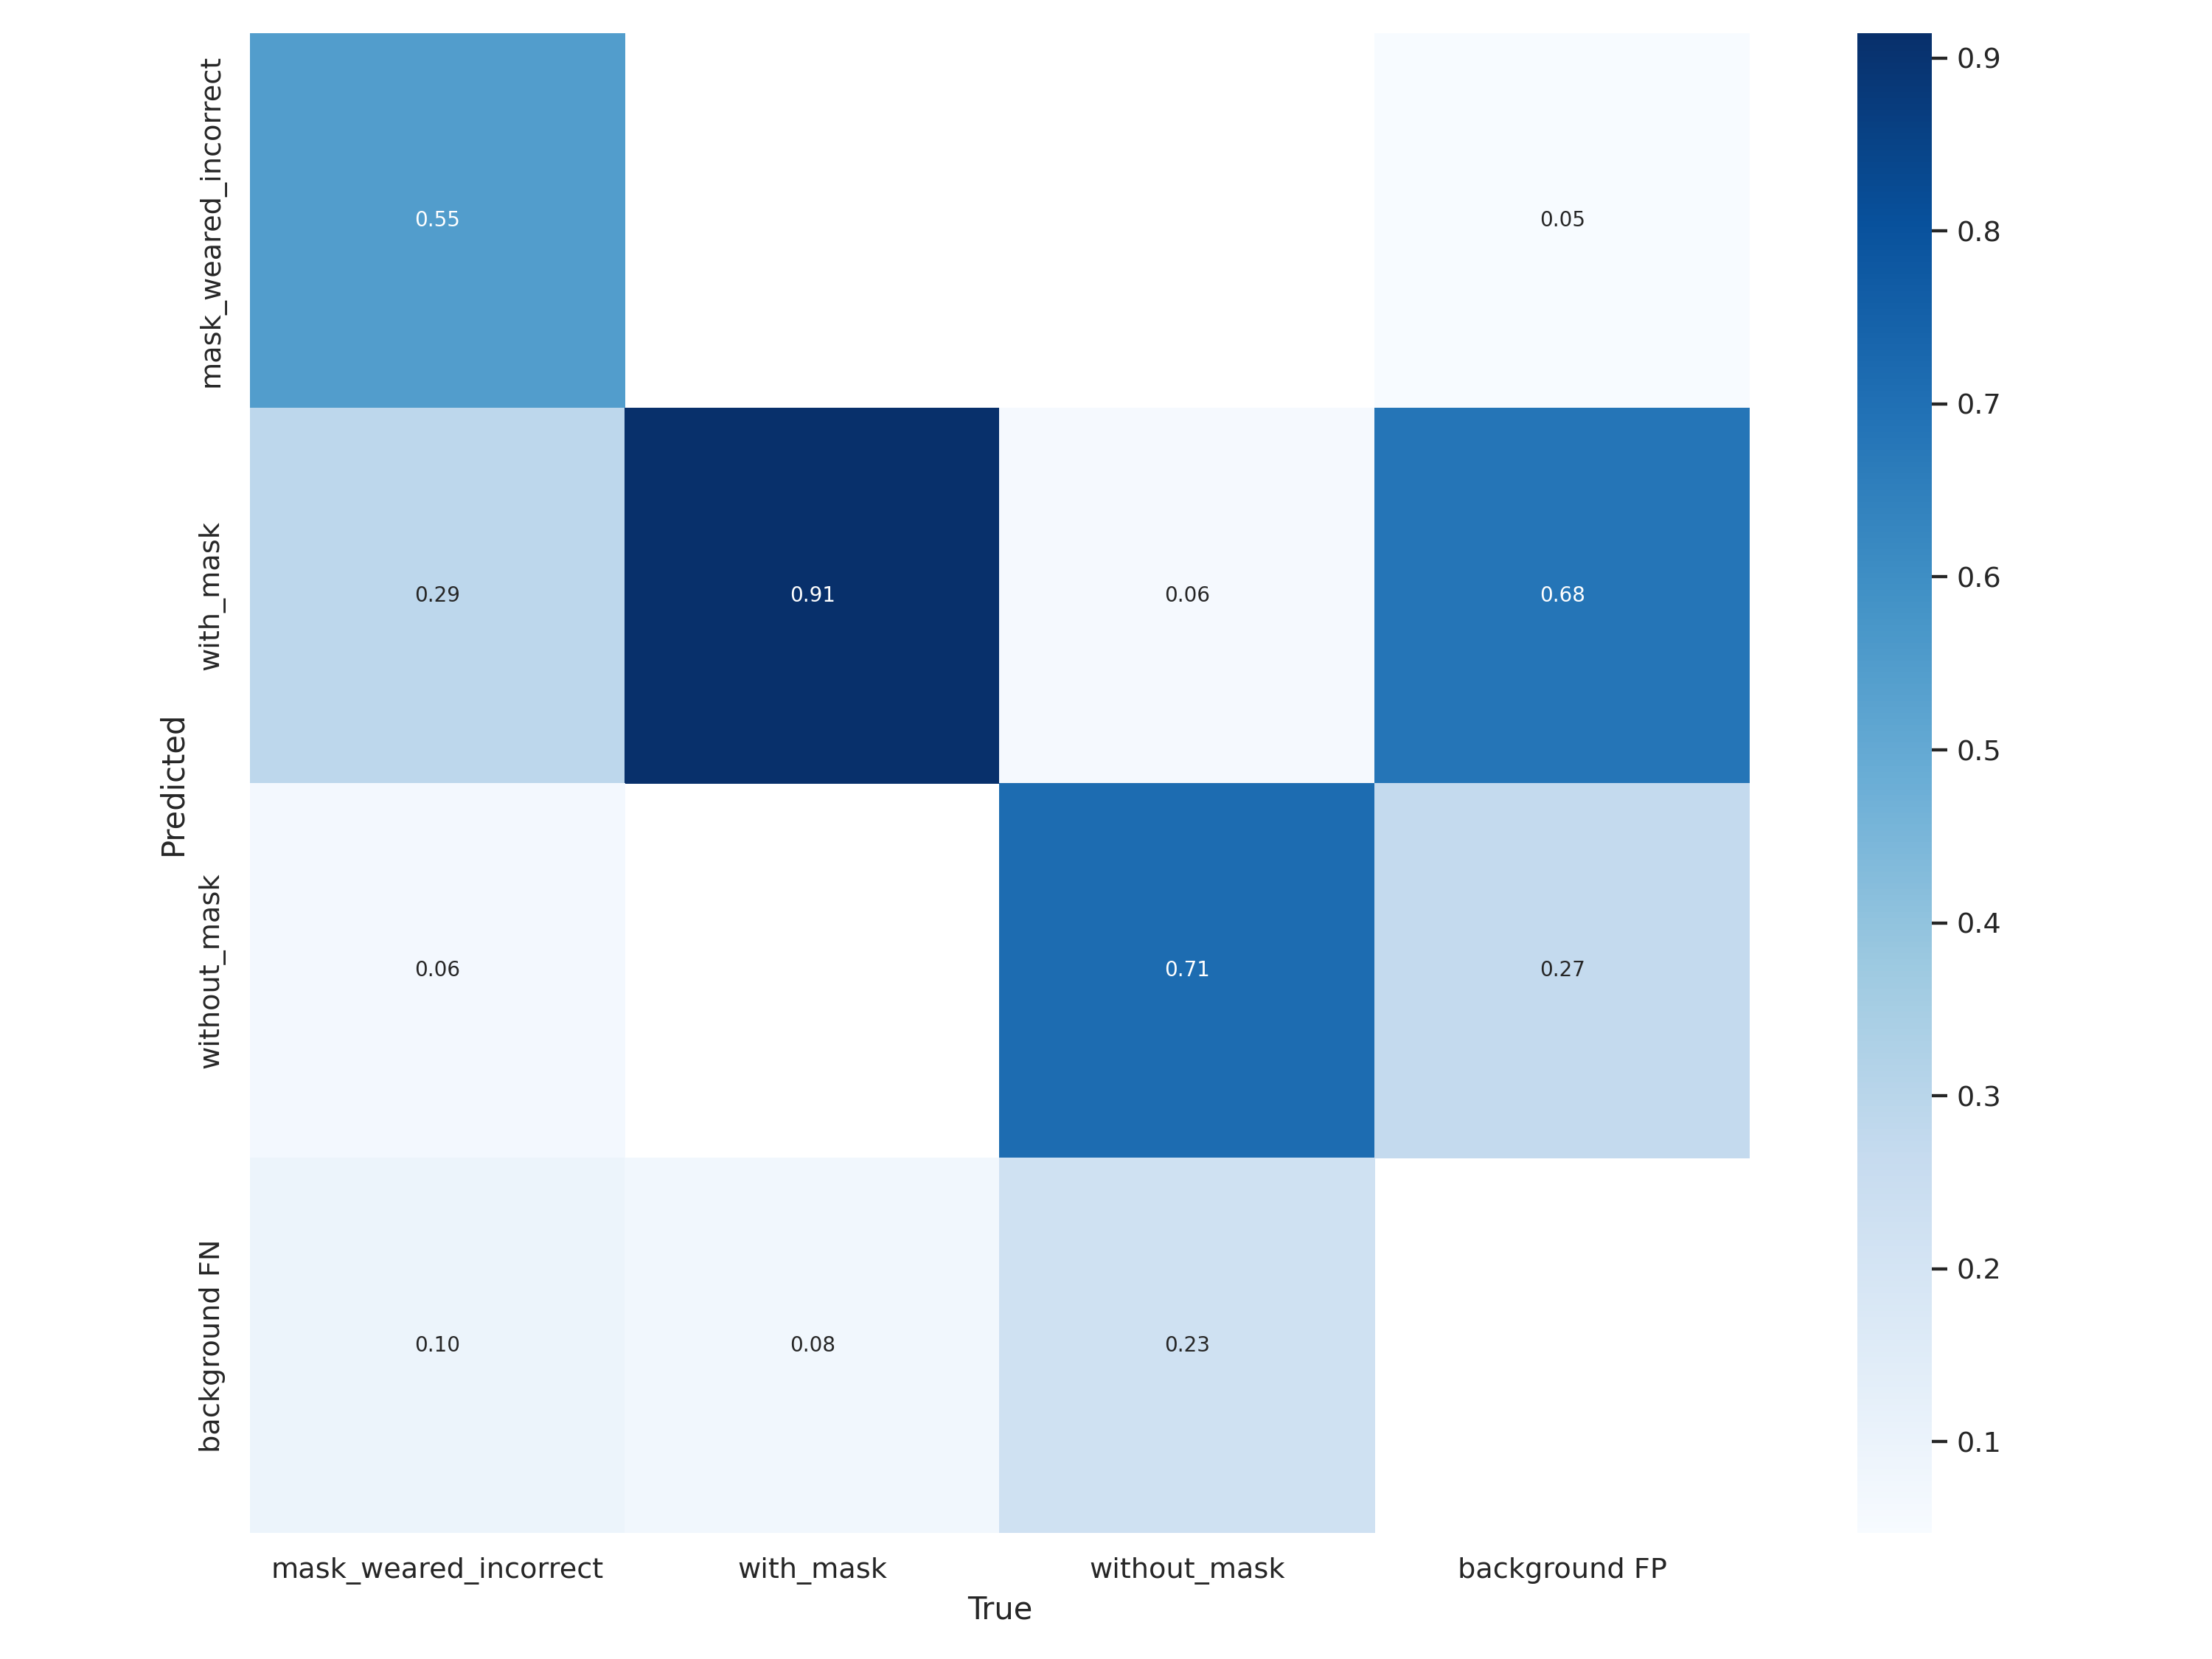

In [ ]:
Image(filename=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp\confusion_matrix.png")

#### 1.7 Real Time Implementation:

In [ ]:
cap= cv2.VideoCapture(0)  #opening webcam  ,  if instead of 0 put video .mp4 realtime detection   23
while cap.isOpened(): #while cam open
    ret, frame= cap.read()    #geting image
    
    #get detetctionq
    results=model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render())) # Yolo is top bar name , passing squeezed rnder photo
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #exiting out of loop
        break
cap.release()
cv2.destroyAllWindows() #destroy pop up